# Generation of MODIS Monthly Composites From Daily Dataset in DEA

**What does this notebook do?** 
This notebook demonstrates how to generate MODIS monthly composites from daily dataset.

**Requirements** 
You need to run the following commands from the command line prior to launching jupyter notebook from the same terminal so that the required libraries and paths are set.

module use /g/data/v10/public/modules/modulefiles

module load dea

If you find an error or bug in this notebook, please either create an 'Issue' in the Github repository, or fix it yourself and create a 'Pull' request to contribute the updated notebook back into the repository (See the repository README for instructions on creating a Pull request).

**Date:** last updated 19th September, 2018

**Author:** Zhi Huang

**Import modules**

In [3]:
from datacube import Datacube
from datacube.storage.masking import mask_invalid_data
%matplotlib inline

**Specify a development database to connect to. It is on a different database server agdcdev-db.nci.org.au, which means that your ~/.pgpass file will need to specify a password to connect to it as well.**

In [4]:
dc = Datacube(config='/g/data/u46/users/dra547/modis_oc.conf')

**design a query**

In [5]:
query = {'latitude':(-30,-40),
        'longitude':(135,145),
        'time':('2016-01-01','2016-03-31')}

**Load three months of SST (Sea Surface Temperature) data from Jan-March 2016. Note that the resolution has been resampled from 0.01 dd to 0.1 dd to save memory usage.**

In [6]:
data = dc.load(product='modis_oc_1d', resolution=(-0.1, 0.1), measurements=('sst',), **query)

**Mask the nodata (-999) as 'nan'**

In [7]:
data = mask_invalid_data(data)

In [8]:
data

<xarray.Dataset>
Dimensions:    (latitude: 100, longitude: 100, time: 91)
Coordinates:
  * time       (time) datetime64[ns] 2016-01-01T11:59:59.999999 ...
  * latitude   (latitude) float64 -30.05 -30.15 -30.25 -30.35 -30.45 -30.55 ...
  * longitude  (longitude) float64 135.1 135.2 135.2 135.4 135.5 135.6 135.7 ...
Data variables:
    sst        (time, latitude, longitude) float32 nan nan nan nan nan nan ...
Attributes:
    crs:      EPSG:4326

**group the loaded data into months**

In [9]:
data2 = data.groupby('time.month')

In [65]:
data2.groups

{1: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 2: [31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59],
 3: [60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90]}

**calculate the monthly means for the corresponding months. Note that the 'nan' values 
are ignored in the calculation.**

In [15]:
data3 = data2.mean('time',keep_attrs=True,skipna=True)

In [16]:
data3

<xarray.Dataset>
Dimensions:    (latitude: 100, longitude: 100, month: 3)
Coordinates:
  * latitude   (latitude) float64 -30.05 -30.15 -30.25 -30.35 -30.45 -30.55 ...
  * longitude  (longitude) float64 135.1 135.2 135.2 135.4 135.5 135.6 135.7 ...
  * month      (month) int64 1 2 3
Data variables:
    sst        (month, latitude, longitude) float32 nan nan nan nan nan nan ...
Attributes:
    crs:      EPSG:4326

**Plot the monthly composites**

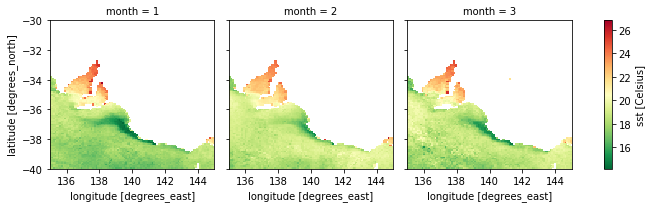

In [18]:
data3.sst.plot(col='month',col_wrap=3,cmap='RdYlGn_r')

**Select one location to prove the monthly mean is correctly calculated.**

In [62]:
data.isel(latitude=80,longitude=50).sst[0:31].mean()

<xarray.DataArray 'sst' ()>
array(17.205456)
Coordinates:
    latitude   float64 -38.05
    longitude  float64 140.1

In [64]:
data3.isel(month=0,latitude=80,longitude=50).sst

<xarray.DataArray 'sst' ()>
array(17.205456, dtype=float32)
Coordinates:
    latitude   float64 -38.05
    longitude  float64 140.1
    month      int64 1
Attributes:
    units:    Celsius
    nodata:   -999.0
    crs:      EPSG:4326